# Facial Expression Recognition (Emotion Detection)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import models, layers, regularizers
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
from collections import Counter

In [4]:
train_path = '/content/drive/MyDrive/fer/train'
val_path = '/content/drive/MyDrive/fer/train'
test_path='/content/drive/MyDrive/fer/test'

## Data Generator

In [5]:
batch_size = 32
target_size = (124,124)

train_datagen = ImageDataGenerator(rescale=1./255.0,
                                   validation_split=0.2,
                                   zoom_range=[0.8,1.5],
                                  horizontal_flip=True,
                                   shear_range=10,
                                   brightness_range=[0.2,2.0],
                                   rotation_range=45
                                  )
valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        subset = 'training',
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

val_generator = valid_datagen.flow_from_directory(
        val_path,
        target_size=target_size,
        subset = 'validation',
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Build Model

In [ ]:
input_shape = (128,128,3) # img_rows, img_colums, color_channels
num_classes = 7

In [ ]:
import tensorflow as tf
InceptionResNetV2=tf.keras.applications.InceptionResNetV2(weights='imagenet',input_shape=input_shape, include_top=False)
model = models.Sequential()
# load the model
model.add(InceptionResNetV2)

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.75))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.50))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 2, 2, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 6144)              0         
                                                                 
 dense (Dense)               (None, 1024)              6292480   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                        

In [ ]:
# # Build Model
# model = models.Sequential()

# model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape, data_format='channels_last'))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(layers.Dropout(0.25))

# model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(layers.Dropout(0.25))

# model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(layers.Dropout(0.25))

# model.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(layers.Dropout(0.25))

# model.add(layers.Flatten())

# model.add(layers.Dense(1024, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(num_classes, activation='softmax'))

# model.summary()

In [ ]:
# Compile Model
plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam( learning_rate=0.0001), metrics=['accuracy'],) 

# **Train Model**

In [ ]:

earlystop =tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=15, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.5, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)
checkpoint=tf.keras.callbacks.ModelCheckpoint(
     './checkpoints', 
    verbose=1, 
    save_weights_only=True,
    save_best_only=True,
    period=5
)
callback=[earlystop,reduce_lr,checkpoint]
history = model.fit(train_generator, epochs=100 ,verbose=1, validation_data=val_generator,callbacks=callback)
models.save_model(model,'./emotion_Classifi_ver.h5') 

Epoch 1/100
845/845 [==============================] - 6705s 8s/step - loss: 1.9066 - accuracy: 0.2184 - val_loss: 1.7151 - val_accuracy: 0.3165 - lr: 1.0000e-04
Epoch 2/100
845/845 [==============================] - 210s 249ms/step - loss: 1.6570 - accuracy: 0.3270 - val_loss: 1.3965 - val_accuracy: 0.4781 - lr: 1.0000e-04
Epoch 3/100
845/845 [==============================] - 210s 248ms/step - loss: 1.4738 - accuracy: 0.4162 - val_loss: 1.2828 - val_accuracy: 0.5093 - lr: 1.0000e-04
Epoch 4/100
845/845 [==============================] - 208s 247ms/step - loss: 1.3927 - accuracy: 0.4665 - val_loss: 1.2062 - val_accuracy: 0.5226 - lr: 1.0000e-04
Epoch 5/100
845/845 [==============================] - ETA: 0s - loss: 1.3246 - accuracy: 0.5010
Epoch 5: val_loss improved from inf to 1.14213, saving model to ./checkpoints
845/845 [==============================] - 213s 252ms/step - loss: 1.3246 - accuracy: 0.5010 - val_loss: 1.1421 - val_accuracy: 0.5635 - lr: 1.0000e-04
Epoch 6/100
845/845

## Save Model

In [ ]:
models.save_model(model,'./emotion_Classifi_ver.h5') 

## Evaluate Model

In [ ]:
# Evaluate Model
score = model.evaluate_generator(test_generator) 
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

## Show Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


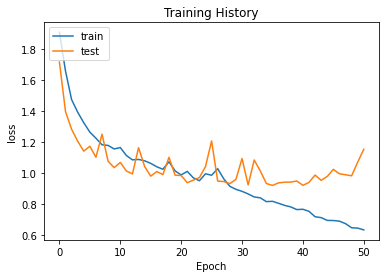

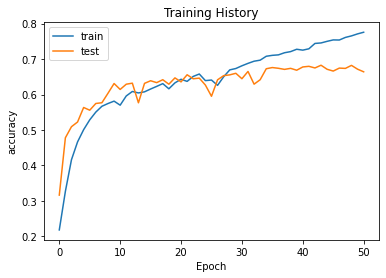

In [ ]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')